# Random Forest
https://www.kaggle.com/c/titanic/data
1. 需要登入才能下載
2. train.csv: 訓練的資料集
3. test.csv: 測試的資料集

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示十個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
884,False,False,False,False,False,False,False,False,False,False,True,False
885,False,False,False,False,False,False,False,False,False,False,True,False


In [4]:
# sum 會針對上面得到的結果加出一個答案
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.fillna(df.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [6]:
# 補完數字以後只剩 Cabin(字串) 和 Embarked(字串) 有遺漏值了
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.drop(["Cabin"], axis = 1)

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
print("Embarked 最常出現:", df['Embarked'].value_counts().idxmax())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
print("補完後的 nan:")
print(df.isnull().sum())

Embarked 最常出現: S
補完後的 nan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
# 創造出 one-hot 欄位
dummy = pd.get_dummies(df['Embarked'])
# concat 是連結的意思, axis = 1 指的是水平的連接
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Embarked"], axis = 1)

dummy = pd.get_dummies(df['Sex'])
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Sex"], axis = 1)

df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",25.0,0,0,SOTON/OQ 392076,7.0500,0,0,1,0,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,0,1,0,1,0


In [11]:
s = df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]
# 這裡我要產生 pdf 的時候 style 會印製不出來, 所以我用最素的
# 讀者可以把下面的註解拿掉替換
# pd.crosstab(s, df['Survived']).T.style.background_gradient(cmap = "autumn")
pd.crosstab(s, df['Survived']).T

1,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [12]:
def name_filter(data):
    if data == 'Mr.':
        return 'Mr'
    elif data == 'Mrs.':
        return 'Mrs'
    elif data == 'Miss.':
        return 'Miss'
    else:
        return 'Unknown'
df['Name'] = s.apply(name_filter)

dummy = pd.get_dummies(df['Name'])
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Name"], axis = 1)
df = df.drop(["Unknown"], axis = 1)

df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,1,0,0
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,0,0,1,0,1,0,1,0
5,6,0,3,28.0,0,0,330877,8.4583,0,1,0,0,1,0,1,0
6,7,0,1,54.0,0,0,17463,51.8625,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,25.0,0,0,SOTON/OQ 392076,7.0500,0,0,1,0,1,0,1,0
885,886,0,3,39.0,0,5,382652,29.1250,0,1,0,1,0,0,0,1


In [13]:
df = df.drop(["Ticket"], axis = 1)
#df = df.drop(["Name"], axis = 1)
df = df.drop(["PassengerId"], axis = 1)

In [14]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(
                                                    df.drop(["Survived"], axis = 1),
                                                    df['Survived'],
                                                    test_size=0.1)

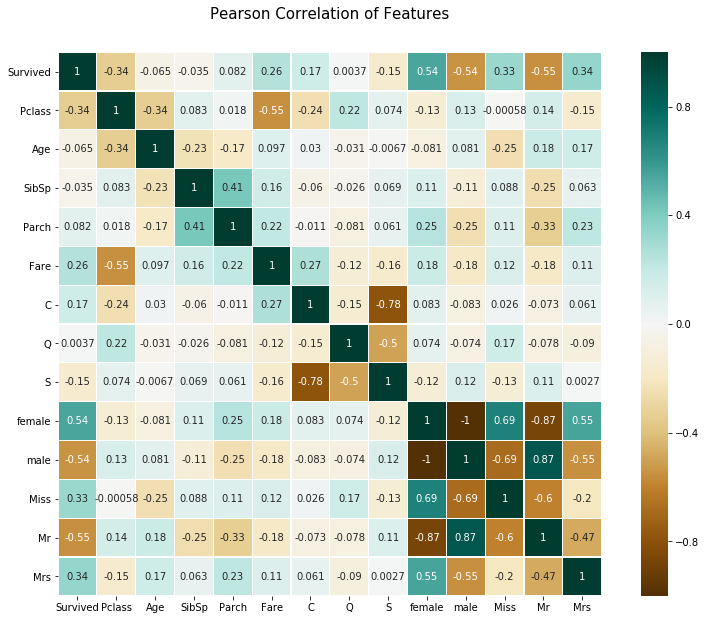

In [15]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG",
            linewidths=0.1, square=True, linecolor='white',
            annot=True)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 20)
clf = clf.fit(data_train, target_train)

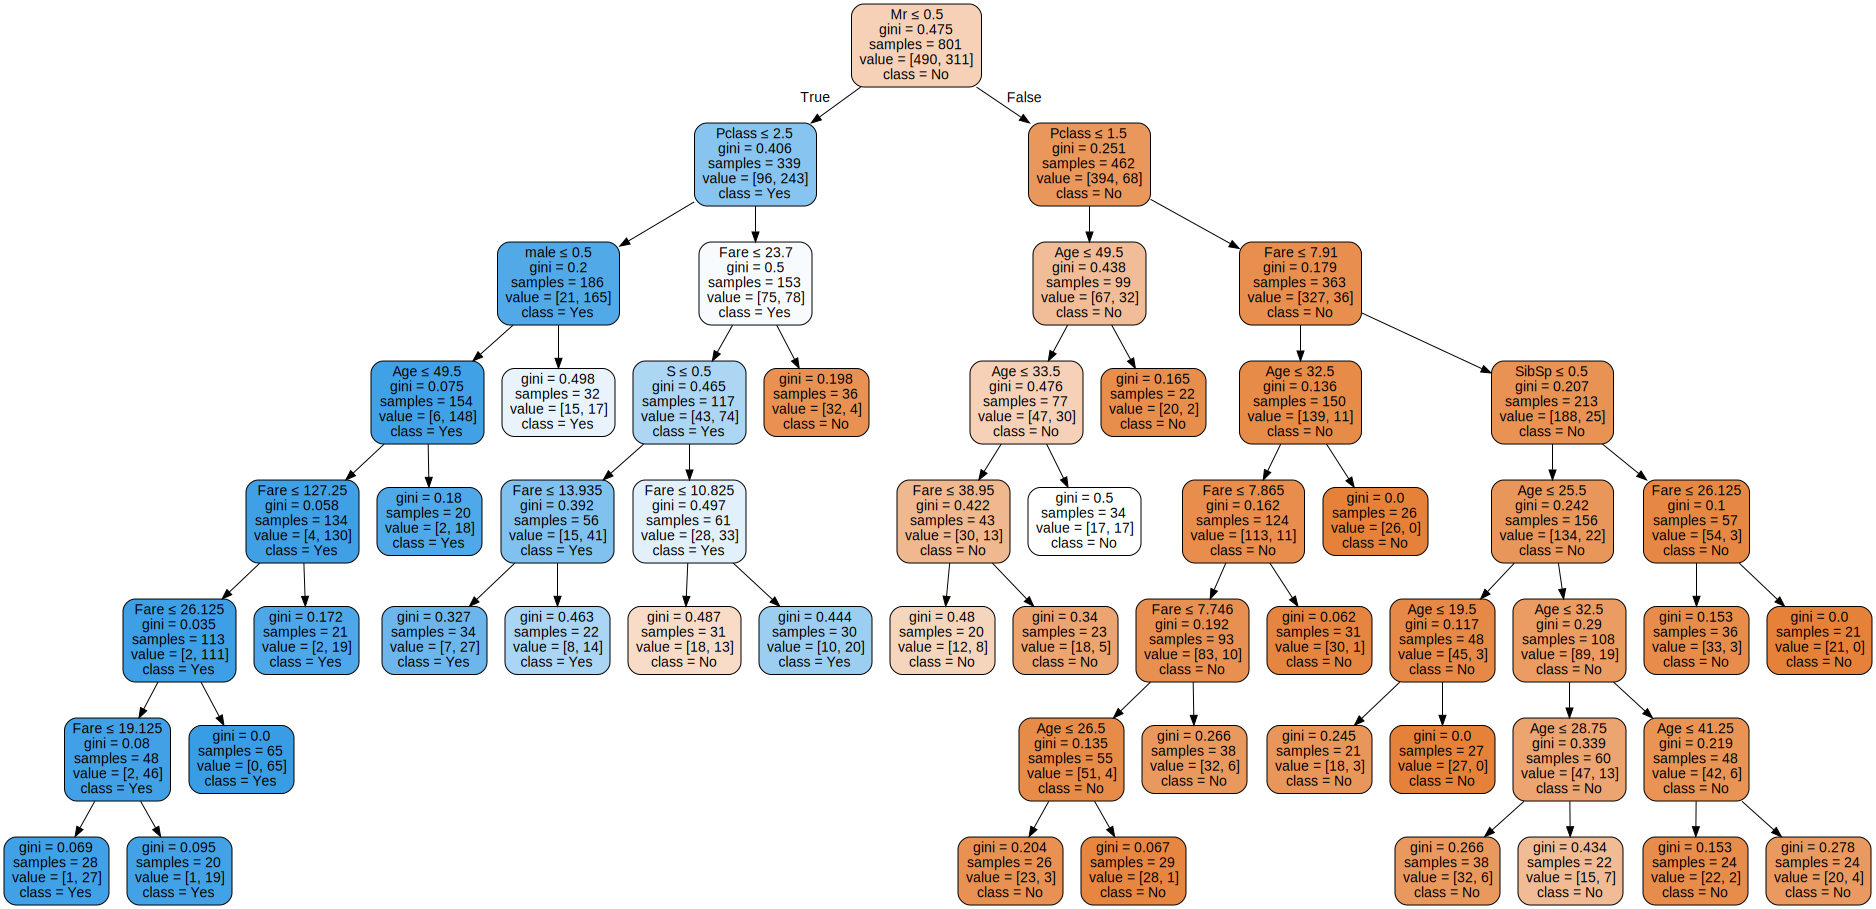

In [17]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=df.drop(["Survived"], axis = 1).columns,
                           class_names=["No", "Yes"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
# 這行可以輸出一個 pdf, 讀者可以自行把註解拿掉試試看
# graph.render("iris2")
graph

In [18]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測　　:", predict)
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測　　: [0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1]
正確標籤: [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]
正確率:  76.66666666666667 %


In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 26, max_depth = 6)

In [20]:
# 這裡就不用 fit 了, fit 和 predict 會由交叉驗證幫你做, cv 參數代表要幾次的交叉驗證
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df.drop(["Survived"], axis = 1),
                         df['Survived'], cv = 10)
print("十次分數:", scores)
# 由於 score 是 ndarray, 可以直接使用 average 來計算平均
import numpy as np
print("平均:", np.average(scores))

十次分數: [0.78888889 0.86666667 0.76404494 0.88764045 0.85393258 0.82022472
 0.83146067 0.78651685 0.87640449 0.86363636]
平均: 0.8339416638293041


In [21]:
from sklearn.ensemble import RandomForestClassifier
# 6 or 7 is good
clf = RandomForestClassifier(n_estimators = 26, max_depth = 6)
clf = clf.fit(df.drop(["Survived"], axis = 1), df['Survived'])
test_df = pd.read_csv("test.csv")

result_df = pd.DataFrame(columns = ["PassengerId", "Survived"])
result_df["PassengerId"] = test_df["PassengerId"]


test_df = test_df.fillna(df.median())
test_df = test_df.drop(["Cabin"], axis = 1)
test_df['Embarked'] = test_df['Embarked'].fillna("S")

dummy = pd.get_dummies(test_df['Embarked'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Embarked"], axis = 1)
test_df = test_df.drop(["Ticket"], axis = 1)
test_df = test_df.drop(["PassengerId"], axis = 1)

dummy = pd.get_dummies(test_df['Sex'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Sex"], axis = 1)

s = test_df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]

test_df['Name'] = s.apply(name_filter)

dummy = pd.get_dummies(test_df['Name'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Name"], axis = 1)
test_df = test_df.drop(["Unknown"], axis = 1)


test_df

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,0,1,0,1,0,1,0
6,3,30.0,0,0,7.6292,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1,37.0,1,0,90.0000,0,1,0,1,0,0,0,1
412,3,28.0,0,0,7.7750,0,0,1,1,0,1,0,0


In [23]:
pre = clf.predict(test_df)
result_df["Survived"] = pre
result_df.to_csv("result_test.csv", index = False)